## Deep Learning
We could define deep learning as a class of machine learning techniques where information is processed in hierarchical layers to understand representations and features from data in increasing levels of complexity. In practice, all deep learning algorithms are neural networks, which share some common basic properties.




<img src='https://drive.google.com/uc?id=18hvLrNjpqgVN-FVWiH9oMOm9bhZypEjk' height='300px' width='600px' align='center'>
<br>
<br>
<br>
<br>

<img src='https://drive.google.com/uc?id=1CF94wYLg6-cp39582EVpL_x6yVsUqY8Y' height='300px' width='600px' align='center'>

<details>
<summary> ML Examples</summary>

1. Linear Regression
2. Logistic Regression
3. SVM
4. Naive Bayes
5. KNN, and more...
</details>

<details>
<summary>DL Examples</summary>

1. LSTM
2. RNN
3. GANs, and more...
</details>



##**Artificial Neural Network**

A neural network is structured like the human brain and consists of artificial neurons, also known as nodes. These nodes are stacked next to each other in three layers:

1. The input layer 
2. The hidden layer(s)
3. The output layer

Here’s a brief description of how they function:

* Artificial neural networks are composed of layers of node
* Each node is designed to behave similarly to a neuron in the brain
* The first layer of a neural net is called the input layer, followed by hidden layers, then finally the output layer
* Each node in the neural net performs some sort of calculation, which is passed on to other nodes deeper in the neural net


<img src='https://drive.google.com/uc?id=1RGVQlwP4hTnT2aF8VR3friuFDTxT5l1L' height='300px' width='600px'>

* The connection between these layers are known as **synapses**.They have associated **weights** which are adjustable.

* Once a neuron receives its inputs from the neurons in the preceding layer of the model, it adds up each signal multiplied by its corresponding weight and passes them on to an activation function.

###**Question!**
#### **What is an activation function?**

The primary role of the Activation Function is to transform the summed weighted input from the node into an output value to be fed to the next hidden layer or as output.
It is a function used in artificial neural networks which outputs a small value for small inputs, and a larger value if its inputs exceed a threshold. If the inputs are large enough, the activation function "fires", otherwise it does nothing. 
In other words, an activation function is like a gate that checks that an incoming value is greater than a critical number.

There are four main types of activation functions:

1. Threshold functions
2. Sigmoid functions
3. Rectifier functions, or ReLUs
4. Hyperbolic Tangent functions

<img src='https://drive.google.com/uc?id=1tJbDdvG5HdpKFtYIYHkwA6NIshTzEIMc' height='550px' width='600px'>

#### **Story so far**
<img src='https://drive.google.com/uc?id=18FLdU1qbVfrsQHTWvc5jlQYdrShZ_5-f' height='300px' width='760px'>
<br>
<br>


<img src='https://drive.google.com/uc?id=1NHAIlP48FCJiC-lkid2nDw9ypSqX064Y' height='300px' width='450px'>
<br>
<br>

#### **Question!**
##### **All good, but how can we train the model?**

Good Question, one word answer is: **Backpropagation**

* After the output is computed,these predictions are fed into a cost function to measure the error of the neural network
* Algorithm is used for backpropagation, to update the weights for each neuron’s input values
* This process is continued until the weights stop changing (or until the amount of their change at each iteration falls below a specified threshold)


## Backpropagation 


<img src='https://drive.google.com/uc?id=1uZbUPNe-keFWcwbMCB89LXLSYePpaZWK' height='300px' width='600px'>

<iframe
    width="640"
    height="480"
    src="https://www.youtube.com/watch?v=rEDzUT3ymw4"
    frameborder="0"
    allow="autoplay; encrypted-media"
    allowfullscreen
>
</iframe>


#####**How to update these weights?**
Again, one word answer: **Optimizers**

An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy. 

How you should change your weights or learning rates of your neural network to reduce the losses is defined by the optimizers you use. Optimization algorithms or strategies are responsible for reducing the losses and to provide the most accurate results possible.

Types of Optimizers:

* Gradient Descent
* Stoachastic Gradient Descent (SDG)
* Mini-Batch Gradient Descent
* SGD with Momentum
* AdaGrad(Adaptive Gradient Descent)
* RMS-Prop (Root Mean Square Propagation)
* Nesterov Accelerated Gradient
* Adagrad
* AdaDelta
* Adams

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# unzip the folder from drive to local space on colab
!unzip -q "/content/drive/MyDrive/Workshop/nlp-getting-started.zip" 

In [3]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
import string
from nltk.stem.porter import PorterStemmer
import numpy as np

#Read data in to a pandas dataframe
df = pd.read_csv('/content/train.csv')

#drop the columns which have Null values
df = df.dropna(how="any", axis=1)

# Special thanks to https://www.kaggle.com/tanulsingh077 for this function
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    #Lower Case
    text = str(text).lower()

    #Remove links starting with https/www
    text = re.sub('https?://\S+|www\.\S+', '', text)

    #Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    #Remove new line character
    text = re.sub('\n', '', text)

    #Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)

    return text

#load the english language stop words list
stop_words = stopwords.words('english')

#We can also add more stopwords according to our data/problem
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

#Define a function to remove the stop words from the corpus
def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

#Initialize the Porter Stemmer Object
stemmer = PorterStemmer()

#define the function to stem the words in the corpus
def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)

    # Remove stopwords
    text = remove_stopwords(text)

    # Stemm all the words in the sentence
    text = stemm_text(text)
    
    return text

df['text_clean'] = df['text'].apply(preprocess_data)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,text,target,text_clean
0,1,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv us
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada
2,5,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...
3,6,"13,000 people receive #wildfires evacuation or...",1,peopl receiv wildfir evacu order california
4,7,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...


In [4]:
# Import model and layers from tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import Embedding

In [5]:
# Define the maximum vocab size, desired embedding dimensions, max length of the sequence
# Truncation type, Token for out of vocabulary words and padding type

vocab_size = 20000
embedding_dim = 6
max_length = 54
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [6]:
# Import Tokenizer and function to pad the sequences to max length

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [7]:
#Initialize the tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

#Tokenize the tweets
tokenizer.fit_on_texts(df['text_clean'].values)

#Save the Dictionary
word_index = tokenizer.word_index

In [ ]:
word_index

{'<OOV>': 1,
 'like': 2,
 'fire': 3,
 'get': 4,
 'amp': 5,
 'bomb': 6,
 'new': 7,
 'via': 8,
 'one': 9,
 'peopl': 10,
 'go': 11,
 'dont': 12,
 'news': 13,
 'burn': 14,
 'kill': 15,
 'video': 16,
 'flood': 17,
 'us': 18,
 'emerg': 19,
 'time': 20,
 'crash': 21,
 'disast': 22,
 'attack': 23,
 'bodi': 24,
 'build': 25,
 'year': 26,
 'look': 27,
 'say': 28,
 'polic': 29,
 'fatal': 30,
 'day': 31,
 'home': 32,
 'love': 33,
 'famili': 34,
 'evacu': 35,
 'would': 36,
 'make': 37,
 'train': 38,
 'still': 39,
 'come': 40,
 'see': 41,
 'storm': 42,
 'california': 43,
 'back': 44,
 'know': 45,
 'watch': 46,
 'suicid': 47,
 'live': 48,
 'want': 49,
 'collaps': 50,
 'world': 51,
 'scream': 52,
 'bag': 53,
 'derail': 54,
 'got': 55,
 'car': 56,
 'death': 57,
 'man': 58,
 'first': 59,
 'rt': 60,
 'take': 61,
 'think': 62,
 'caus': 63,
 'cant': 64,
 'need': 65,
 'nuclear': 66,
 'work': 67,
 'wreck': 68,
 'drown': 69,
 'war': 70,
 'two': 71,
 'today': 72,
 'youtub': 73,
 'destroy': 74,
 'accid': 75,
 '

In [8]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['text_clean'], df['target'], test_size=0.2, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

6090 6090
1523 1523


In [9]:
training_sequences = tokenizer.texts_to_sequences(x_train.values)
training_padded = pad_sequences(training_sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(x_test.values)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [ ]:
training_sequences[0]

[4320, 4103, 2690, 65, 102, 174, 6, 939, 218, 1791, 4874]

In [ ]:
training_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4320,
       4103, 2690,   65,  102,  174,    6,  939,  218, 1791, 4874],
      dtype=int32)

In [10]:
model =Sequential()
model.add(Embedding(vocab_size, embedding_dim,input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 54, 6)             120000    
                                                                 
 global_average_pooling1d (G  (None, 6)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 120,049
Trainable params: 120,049
Non-trainable params: 0
_________________________________________________________________


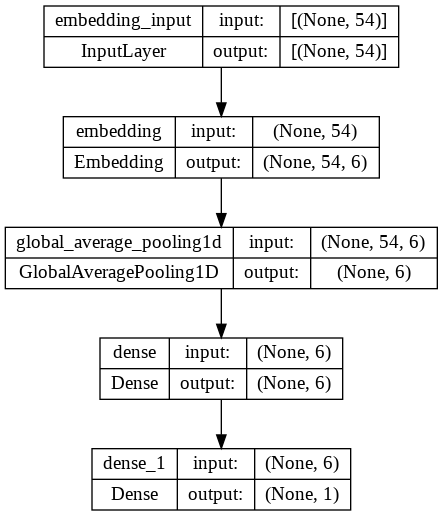

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

In [ ]:
model.get_layer('dense_1').weights

In [13]:
import tensorflow as tf

In [14]:
training_labels_final = np.array(y_train)
testing_labels_final = np.array(y_test)

In [15]:
num_epochs = 11
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/11
191/191 [==============================] - 4s 13ms/step - loss: 0.6850 - accuracy: 0.5680 - val_loss: 0.6800 - val_accuracy: 0.5739
Epoch 2/11
191/191 [==============================] - 1s 5ms/step - loss: 0.6778 - accuracy: 0.5695 - val_loss: 0.6729 - val_accuracy: 0.5739
Epoch 3/11
191/191 [==============================] - 1s 6ms/step - loss: 0.6645 - accuracy: 0.5704 - val_loss: 0.6575 - val_accuracy: 0.5942
Epoch 4/11
191/191 [==============================] - 2s 9ms/step - loss: 0.6353 - accuracy: 0.6284 - val_loss: 0.6253 - val_accuracy: 0.6855
Epoch 5/11
191/191 [==============================] - 1s 8ms/step - loss: 0.5827 - accuracy: 0.7419 - val_loss: 0.5818 - val_accuracy: 0.8129
Epoch 6/11
191/191 [==============================] - 1s 5ms/step - loss: 0.5150 - accuracy: 0.8235 - val_loss: 0.5275 - val_accuracy: 0.7899
Epoch 7/11
191/191 [==============================] - 1s 5ms/step - loss: 0.4485 - accuracy: 0.8498 - val_loss: 0.4908 - val_accuracy: 0.7899
Epoch

In [20]:
!mkdir -p saved_model
model.save()

In [17]:
model.save('model1.h5')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

In [ ]:
model1 =Sequential()
model1.add(Embedding(vocab_size, embedding_dim,input_length=max_length))
model1.add(GlobalAveragePooling1D())
model1.add(Dense(6, activation='relu'))
model1.add(Dense(6, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 20
history1 = model1.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

In [ ]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()


In [ ]:
%matplotlib inline
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

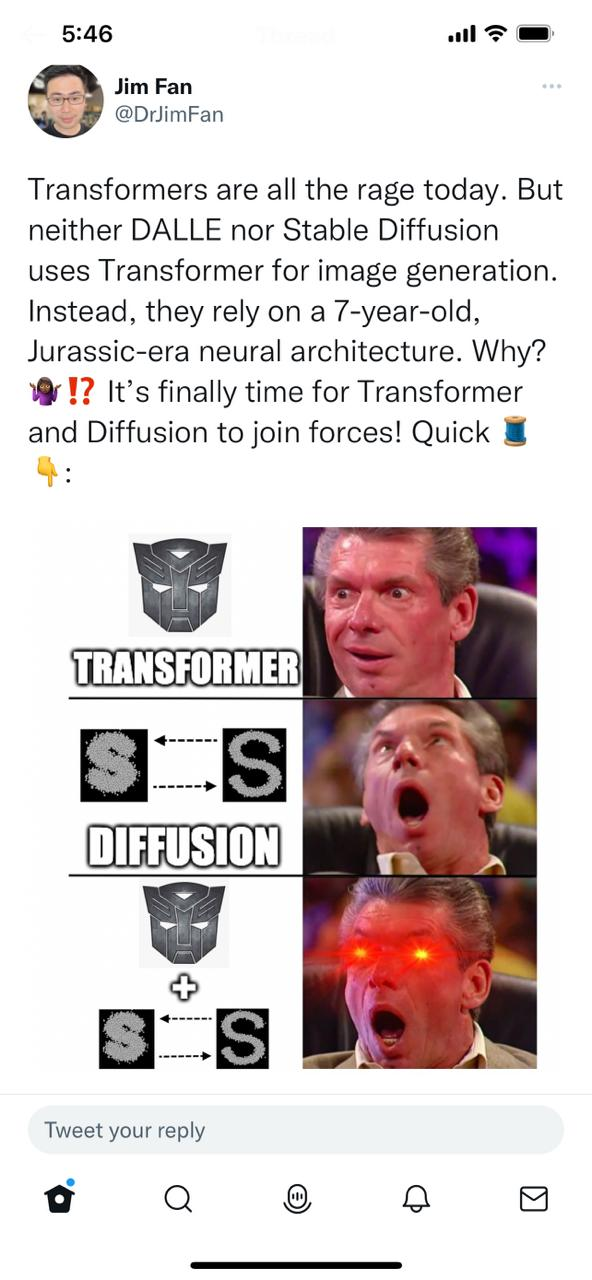

###References
* https://www.simplilearn.com/tutorials/deep-learning-tutorial/deep-learning-algorithm
* https://www.coursera.org/articles/ai-vs-deep-learning-vs-machine-learning-beginners-guide

* https://towardsdatascience.com/deep-learning-basics-a-crash-course-3213aa9e477c
* https://www.youtube.com/watch?v=aircAruvnKk (Animation of Neural Network)
* https://www.ibm.com/cloud/learn/neural-networks
* https://machinelearningknowledge.ai/animated-explanation-of-feed-forward-neural-network-architecture/
* https://www.youtube.com/watch?v=rEDzUT3ymw4 (ANN under a min)
* https://www.freecodecamp.org/news/deep-learning-neural-networks-explained-in-plain-english/
* https://www.freecodecamp.org/news/deep-learning-neural-networks-explained-in-plain-english/
####Activation Functions
* https://www.v7labs.com/blog/neural-networks-activation-functions#:~:text=An%20Activation%20Function%20decides%20whether,prediction%20using%20simpler%20mathematical%20operations
* https://deepai.org/machine-learning-glossary-and-terms/activation-function

####Loss Functions
* https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/

####Optimizers
* https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6
* https://medium.com/mlearning-ai/optimizers-in-deep-learning-7bf81fed78a0
* https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/#:~:text=An%20optimizer%20is%20a%20function,loss%20and%20improve%20the%20accuracy.

####Tensorflow
* https://github.com/AtrCheema/ml_tutorials/blob/master/understanding_dense_layer_tf.ipynb